# Atividades da Semana 2

Crie um Notebook no Google Colab com o nome [ELT575_Semana2_<Matrícula>], modificando o campo <Matrícula> pela sua matrícula do Sapiens. As questões devem ser inseridas e respondidas no próprio notebook, sendo seguindas pelas implementações requeridas pela atividade. Ao final, envie o link do notebook como resposta da tarefa (lembre-se de deixar o acesso ao notebook público). Tente organizar o notebook em seções.

## Parte 1

1 - Explique o que são e o funcionamento das Redes Neurais Convolucionais (CNN), enfatizando as principais diferenças entre esse tipo de modelo e as redes neurais MLPs?

As redes neurais convolucionais diferem das redes neurais multicamadas porque, enquanto estas possuem camadas totalmente conectadas, as primeiras possuem, em sua arquitetura, as chamadas camadas convolucionais, cujos neurônios se conectam apenas em parte das saídas da camanda precedente.

Essa concepção faz com que as camadas convolucionais se ocupem das características de baixo nível das camadas antecedentes e as repasse para a camada de nível superior. 

Note-se que, assim sendo, demandam-se menos ajustes de parâmetros, e, consequentemente, menor tempo de treinamento e poder computacional.

2 - Como ocorrem o compartilhamento de parâmetros e a esparsidade em uma CNN?

O compartilhameno de parâmetros ocorre na operação de convolução. O filtro (kernel), que nada mais é do que uma matriz de pesos, desliza por toda a imagem sem que seus parâmetros sejam alterados. Assim, um filtro com n canais aprendidos para determinada camada convolucional não se altera para todos os campos receptivos locais das entradas daquela camada, garantindo melhor eficiência do modelo. Desse modo, as características da imagem vão sendo extraídas e mapeadas, produzindo-se, na saída, o que se convencionou chamar de feature map.

A esparsividade diz respeito ao fato de que, diversamente do que ocorre com as MLPs, nem todos os neurônios de uma camada (convolucional) estão ligados aos neurônios da camada antecedente. Com essa técnica, menos parâmetros precisam ser ajustados. Diz-se, assim, que a rede se torna mais esparsa.

3 - Qual a função da camada Max Pooling? Por que tal função desta camada é importante?

As camadas de Max Pooling têm a finalidade de criar uma subamostragem dos valores da camada precedente. Camadas assim reduzem a resolução espacial da imagem de entrada, requisitando menos recursos computacionais. O processo compreende a divisão das imagens em partes e a extração dos valores mais significativos de cada parte. Isso faz com que as principais características da imagem seja preservadas na opeação. Por outro lado, garante que o modelo não seja tão influenciado por pequenas variações da imagem, como uma pequena alteração de posição do objeto. 


4 - As técnicas de regularização são bastante utilizadas para tentar evitar o sobreajuste (overfitting) do modelo. Uma regularização bastante adotada em CNNs é o Dropout, sendo um método bastante simples e eficaz. Explique no que consiste a regularização Dropout e como implementá-la.

O Dropout é uma técnica que desativa parte dos neurônios nas etapas de treinamento, fazendo com que seus pesos não se alterem nessas etapas. Isso faz com que os demais neurônios executem a tarefa do neurônio "desligado", criando uma redundância.

Para implementar uma camada de dropout no TensorFlow, basta usar a classe tf.keras.layers.Dropout(). Dentro dos parênteses () poderíamos indicar o índice 0.2, por exemplo, que indicaria o "desligamento" de 20% dos neurônios em cada etapa do treinamento. 

```python
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
```

## Parte 2

Link para notebook Image_classification_CNN: https://colab.research.google.com/drive/1r0pIj6INqqhnOwctukEYmih84GTTTiqN?usp=sharing

Repita o exemplo Image_classification_CNN usando o dataset CIFAR-10 (https://www.tensorflow.org/datasets/catalog/cifar10), também disponível no Tensorflow. As imagens agora tem a forma 32 x 32 x 3, sendo necessário fazer ajustes na rede para esse caso. Recomendado executar usando o recurso de GPU do Colab agilizar os treinamentos das redes. Houve muita diferença no desempenho da rede treinada quando comparado ao exemplo?

Experimente adicionar mais dois blocos de camadas Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2) antes da camada Flatten e compare os resultados.

Seguindo o modelo modificado no item anterior, experimente adicionar um Dropout de 20% após cada camada MaxPooling. Comente os resultados obtidos.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

### Cifar 10
O cifar10 é um conjunto de dados com 60.000 imagens coloridas (50.000 de treinamento e 10.000 de teste), de formato 32 x 32 x 3. Estão distribuídas em 10 classes de 6.000 imagens cada.

Fonte: https://www.tensorflow.org/datasets/catalog/cifar10?hl=pt-br

In [ ]:
# Carregando o dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# fazendo um reshape no dataset para ter um único canal
trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
testX = testX.reshape((testX.shape[0], 32, 32, 3))

# Convertendo valores dos pixels em float
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalização para escala [0-1]
trainX = trainX / 255.0
testX = testX / 255.0

# transformando a variável alvo (target) para uma codificação one hot
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
# definindo modelo
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/10
1250/1250 [==============================] - 55s 43ms/step - loss: 1.5566 - accuracy: 0.4373 - val_loss: 1.3319 - val_accuracy: 0.5311
Epoch 2/10
1250/1250 [==============================] - 50s 40ms/step - loss: 1.2563 - accuracy: 0.5576 - val_loss: 1.2345 - val_accuracy: 0.5630
Epoch 3/10
1250/1250 [==============================] - 46s 37ms/step - loss: 1.1507 - accuracy: 0.5948 - val_loss: 1.1734 - val_accuracy: 0.5897
Epoch 4/10
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0700 - accuracy: 0.6241 - val_loss: 1.1801 - val_accuracy: 0.5875
Epoch 5/10
1250/1250 [==============================] - 48s 39ms/step - loss: 1.0112 - accuracy: 0.6465 - val_loss: 1.1836 - val_accuracy: 0.5867
Epoch 6/10
1250/1250 [==============================] - 48s 39ms/step - loss: 0.9607 - accuracy: 0.6630 - val_loss: 1.1308 - val_accuracy: 0.6109
Epoch 7/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.9159 - accuracy: 0.6787 - val_loss: 1.1243 -

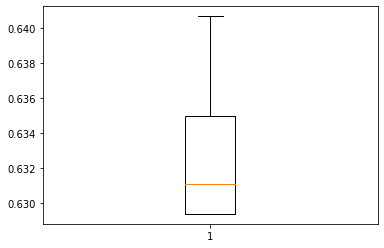

In [ ]:
scores = [] 
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):
  
  model = define_model()
  
  # recorta dados de acordo com índices da k-fold
  train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
  
  # treinamento do modelo
  history = model.fit(train_data, train_target, 
                      epochs=10, batch_size=32, 
                      validation_data=(val_data, val_target), 
                      verbose=1)
  
  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_target, verbose=0)
  print('> %.3f' % (acc * 100.0))
  
  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

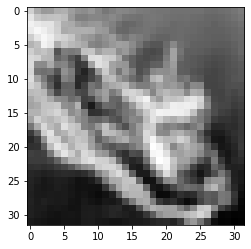

In [ ]:
plt.imshow(testX[15,:,:,0], cmap='gray');

In [ ]:
np.argmax(model.predict(np.expand_dims(testX[15], axis=0)))

1/1 [==============================] - 0s 137ms/step


8

Experimente adicionar mais dois blocos de camadas Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2) antes da camada Flatten e compare os resultados.


Seguindo o modelo modificado no item anterior, experimente adicionar um Dropout de 20% após cada camada MaxPooling. Comente os resultados obtidos.

In [ ]:
# Adicionando Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2)
def define_model_1():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/10
1250/1250 [==============================] - 68s 54ms/step - loss: 1.4837 - accuracy: 0.4642 - val_loss: 1.2101 - val_accuracy: 0.5711
Epoch 2/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.1289 - accuracy: 0.6028 - val_loss: 1.0629 - val_accuracy: 0.6202
Epoch 3/10
1250/1250 [==============================] - 67s 53ms/step - loss: 0.9832 - accuracy: 0.6583 - val_loss: 0.9877 - val_accuracy: 0.6573
Epoch 4/10
1250/1250 [==============================] - 66s 52ms/step - loss: 0.8842 - accuracy: 0.6918 - val_loss: 0.9541 - val_accuracy: 0.6698
Epoch 5/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.8054 - accuracy: 0.7175 - val_loss: 0.9666 - val_accuracy: 0.6639
Epoch 6/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.7327 - accuracy: 0.7449 - val_loss: 0.8980 - val_accuracy: 0.6887
Epoch 7/10
1250/1250 [==============================] - 66s 53ms/step - loss: 0.6657 - accuracy: 0.7679 - val_loss: 0.9218 -

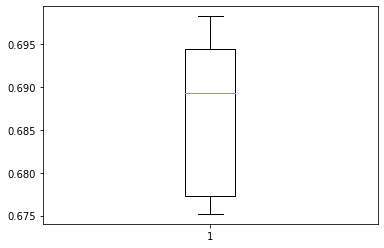

In [ ]:
scores = [] 
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):
  
  model = define_model_1()
  
  # recorta dados de acordo com índices da k-fold
  train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
  
  # treinamento do modelo
  history = model.fit(train_data, train_target, 
                      epochs=10, batch_size=32, 
                      validation_data=(val_data, val_target), 
                      verbose=1)
  
  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_target, verbose=0)
  print('> %.3f' % (acc * 100.0))
  
  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

In [ ]:
# Adicionando um Dropout de 20% após cada camada MaxPooling
def define_model_2():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/10
1250/1250 [==============================] - 73s 58ms/step - loss: 1.5780 - accuracy: 0.4252 - val_loss: 1.2749 - val_accuracy: 0.5583
Epoch 2/10
1250/1250 [==============================] - 71s 57ms/step - loss: 1.2183 - accuracy: 0.5698 - val_loss: 1.0922 - val_accuracy: 0.6207
Epoch 3/10
1250/1250 [==============================] - 76s 61ms/step - loss: 1.0853 - accuracy: 0.6178 - val_loss: 1.0348 - val_accuracy: 0.6377
Epoch 4/10
1250/1250 [==============================] - 72s 58ms/step - loss: 0.9976 - accuracy: 0.6534 - val_loss: 1.0315 - val_accuracy: 0.6353
Epoch 5/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.9343 - accuracy: 0.6751 - val_loss: 0.9525 - val_accuracy: 0.6641
Epoch 6/10
1250/1250 [==============================] - 82s 65ms/step - loss: 0.8772 - accuracy: 0.6943 - val_loss: 1.0418 - val_accuracy: 0.6347
Epoch 7/10
1250/1250 [==============================] - 85s 68ms/step - loss: 0.8362 - accuracy: 0.7042 - val_loss: 0.9022 -

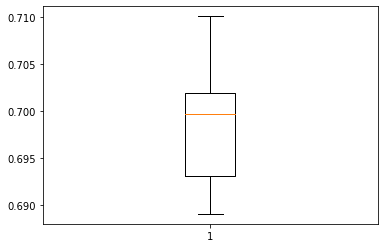

In [ ]:
scores = [] 
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):
  
  model = define_model_2()
  
  # recorta dados de acordo com índices da k-fold
  train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
  
  # treinamento do modelo
  history = model.fit(train_data, train_target, 
                      epochs=10, batch_size=32, 
                      validation_data=(val_data, val_target), 
                      verbose=1)
  
  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_target, verbose=0)
  print('> %.3f' % (acc * 100.0))
  
  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

## Conclusão

Para a resolução do exercício, partimos do modelo-base, assim considerado o anteriormente utilizado com o dataset MNIST. 

Para a utilização do modelo com o dataset CIFAR-10 foi necessário adequar os parâmetros da primeira camada (Conv2D), para adequá-lo ao formato das figuras (32x32x3).

Depois de compilado, rodamos o modelo-base.

Para a avaliação do modelo, usamos a técnica da validação cruzada K-fold. O conjunto de dados foi embaralhado (shuffle=True) e dividido por 5 vezes (n_splits), calculando-se, em cada uma delas, a acurácia, com a função model.evaluate().

Os valores foram adicionados a uma lista, da qual se extraíram a média e o desvio-padrão. O boxplot resultante também foi exibido.

O modelo-base apresentou acurácia média de 63.31 %, com desvio-padrão de 0.43

Adicionando Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2), observamos acurácia de 68.69 % e desvio-padrão de 0,92.

Adicionando um Dropout de 20% após cada camada MaxPooling, obtivemos acurácia média de 69.88 % e desvio-padrão de 0,73.